In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_val_score


In [ ]:
#cross validation is to evaluate the performance of machine learning models

In [3]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [ ]:
#Standard Scaler is used to standardize features by removing the mean and scaling to unit variance
#Label Encoder is used to encode categorical labels into numeric format for ML models

In [4]:
from sklearn.impute import SimpleImputer
#Used to handle missing data by replacing missing values by a specific strategy

In [5]:
from sklearn.ensemble import RandomForestClassifier
#for classification task

In [6]:
from sklearn.linear_model import LogisticRegression

In [7]:
from sklearn.svm import SVC
#IMPORTS the Support Vector Classification used for classification tasks, especially when data is high dimensional

In [8]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, recall_score, precision_score, f1_score

In [9]:
from imblearn.over_sampling import SMOTE

In [10]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
df= pd.read_csv('loan_default_risk_data.csv')

In [12]:
print(df.isnull().sum())

age                  0
income               0
loan_amount          0
credit_score         0
employment_status    0
marital_status       0
education_level      0
loan_term            0
loan_purpose         0
default              0
dtype: int64


In [14]:
df.head(5)

,age,income,loan_amount,credit_score,employment_status,marital_status,education_level,loan_term,loan_purpose,default
0,56,22695,44353,697,Unemployed,Divorced,Master,12,Car,1
1,46,68190,22675,576,Employed,Single,Bachelor,24,Car,0
2,32,25258,49417,803,Employed,Divorced,Master,12,Education,0
3,60,107538,28938,691,Employed,Single,PhD,12,Home,0
4,25,59504,28664,434,Unemployed,Single,High School,12,Home,1


In [16]:
label_encoder = LabelEncoder()
df['loan_purpose'] = label_encoder.fit_transform(df['loan_purpose'])
df['employment_status'] = label_encoder.fit_transform(df['employment_status'])
df['education_level']=label_encoder.fit_transform(df['education_level'])
df['marital_status']=label_encoder.fit_transform(df['marital_status'])

In [17]:
df.head(2)

,age,income,loan_amount,credit_score,employment_status,marital_status,education_level,loan_term,loan_purpose,default
0,56,22695,44353,697,1,0,2,12,0,1
1,46,68190,22675,576,0,2,0,24,0,0


In [18]:
df['marital_status'].unique()

array([0, 2, 1])

In [19]:
x=df.drop(columns=['default'])
y=df['default']

smote= SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x,y)

In [20]:
#normalize or standardize numerical features
scaler = StandardScaler()
df[['income','loan_amount','credit_score']]=scaler.fit_transform(df[['income','loan_amount','credit_score']])

In [ ]:
#EDA

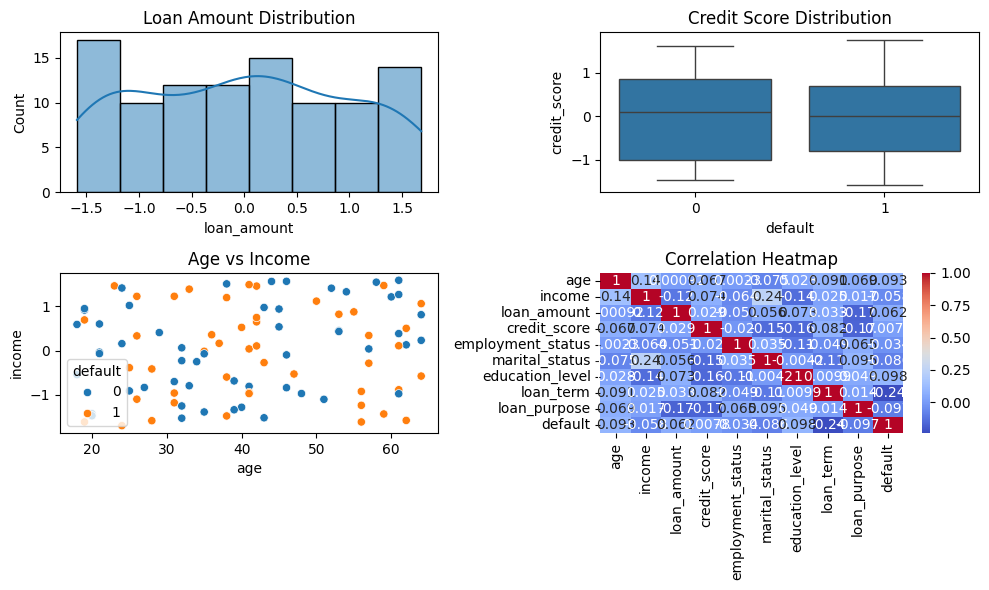

In [24]:
#Visualize data
plt.figure(figsize=(10,6))
#Histogram ofloan ampunts
plt.subplot(2,2,1)
sn.histplot(df['loan_amount'], kde=True)
plt.title('Loan Amount Distribution')

#Boxplot of credit score
plt.subplot(2,2,2)
sn.boxplot(x='default',y='credit_score', data= df)
plt.title('Credit Score Distribution')

#Scatter plot for age vs income

plt.subplot(2,2,3)
sn.scatterplot(x='age', y='income', hue='default', data=df)
plt.title('Age vs Income')
#Hue is one of the main properties (called color appearance parameters) of a color, defined technically

#Correlation Heatmap
plt.subplot(2,2,4)
sn.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

plt.tight_layout()
plt.show()

In [27]:
#Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.3, random_state=42)

In [29]:
import numpy as np
#Train different classification models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC()
}
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    #Model Evaluation
    print(f'\n{name} Model Evaluation:')
    print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}')
    print(f'Classification Report:\n{classification_report(y_test, y_pred)}')
    print('Recall:', recall_score(y_test, y_pred))
    print('Precision:', precision_score(y_test, y_pred))
    print('F1 Score:', f1_score(y_test, y_pred))
    print('ROC-AUC:', roc_auc_score(y_test, y_pred))

    #Cross-validation
    cross_val_scores = cross_val_score(model, x_train, y_train, cv=5, scoring='accuracy')
    print(f'Cross-Validation Scores: {cross_val_scores}')

    print('Cross-validation accuracy:', np.mean(cross_val_scores))


Logistic Regression Model Evaluation:
Accuracy: 0.59375
Confusion Matrix:
[[11  3]
 [10  8]]
Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.79      0.63        14
           1       0.73      0.44      0.55        18

    accuracy                           0.59        32
   macro avg       0.63      0.62      0.59        32
weighted avg       0.64      0.59      0.59        32

Recall: 0.4444444444444444
Precision: 0.7272727272727273
F1 Score: 0.5517241379310345
ROC-AUC: 0.6150793650793651
Cross-Validation Scores: [0.6        0.46666667 0.4        0.53333333 0.57142857]
Cross-validation accuracy: 0.5142857142857142

Random Forest Model Evaluation:
Accuracy: 0.53125
Confusion Matrix:
[[10  4]
 [11  7]]
Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.71      0.57        14
           1       0.64      0.39      0.48        18

    accuracy                           